<a href="https://colab.research.google.com/github/pablocoque/Phyton-Astrophysics-short-projects/blob/main/simple_stellar_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polytropic Model of a Non-relativistic White Dwarf

## Solving Numerically the Lane-Emden Equation

### Polytropic models

The Lane-Emden equation is:


With initial conditions $\theta(\xi=0)=1$ and $\frac{d\theta}{d\xi}=0$.

To solve it numerically, first it is needed to transform the second order ODE to a system of two first order ODEs. The system is:

Once this is defined, the numerical solution can be computed. I used the numerical solver inside Python's Scipy package called odeint. First, I defined a python function containing the ODE system and the numerical space where the solutions are going to be calculated, the initial conditions and an array containing the different polytropic indexes for the solutions.



In [ ]:
# Importing necessary packages for the script
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

In [ ]:
def lane_emden(Y, x, n):
  ''' Lane-Emden equation
  The polytropic index must be supplied to the function
  '''
  y0 = Y[0]
  y1 = Y[1]
  dy0dx = y1
  dy1dx = -y0**n - (2/x)*y1
  return np.array([dy0dx,dy1dx])

In [ ]:
initial = [1, 0] # initial conditions \theta = 1 and d\theta/d\xi = 0 at \xi = 0
x = np.linspace(1e-15,35,5000) # \xi values (from 0 to 35)
n = np.arange(0,5.5,0.5) # polytropic indexes

Now, I can just call the numericall solver and store the solutions inside two lists: one for the values of $\theta$ for each index, and one for the values of $\frac{d\theta}{d\xi}$ for each index. 

In [ ]:
theta = []
dtheta = []
for i in n: # Loop to get the solution for each index
  solution = odeint(lane_emden, initial, x, args=(i,))
  y = []
  for i in solution[:,0]: # Loop to cut the solution at \theta = 0
    if i > 0:
      y.append(i)
    else:
      break
  theta.append(y)
  dtheta.append(solution[:len(y),1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Now, I can plot the solutions for each index. The solutions reproduce the decreasing behaviour of $\theta$ from 1 at $\xi = 0$ to 0 at $\xi = \xi_1$ for indexes $n<5$. At $n=5$, the solution decreases asymptotically to 0 so the radial coordinate tends to infinity, i.e. $\xi_1 \rightarrow \infty$.

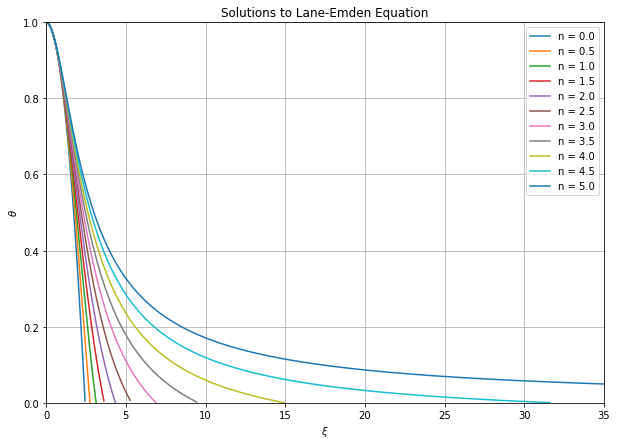

In [ ]:
plt.figure(figsize=(10,7))
for i in range(0,len(n)):
  plt.plot(x[:len(theta[i])], theta[i], label= "n = {}".format(n[i]))
plt.legend(loc=1)
plt.title('Solutions to Lane-Emden Equation')
plt.xlim(0,35)
plt.xlabel(r'$\xi$')
plt.ylim(0,1)
plt.ylabel(r'$\theta$')
plt.grid(True)

From the numerical solutions, I can calculate the different parameters of the polytropic model which are $R_\textrm{n}$, $D_\textrm{n}$, $M_\textrm{n}$ and $B_\textrm{n}$.

In [ ]:
R_n = [] # An array for each parameter to store values at different indexes
D_n = []
M_n = []
B_n = []
for i in range(0,len(n)-1): # Loop to calculate parameters at each index (excluding n=5)
  R_n.append(x[len(theta[i])-1])
  D_n.append(-(3*dtheta[i][-1]/x[len(theta[i])-1])**(-1))
  M_n.append(-(x[len(theta[i])-1])**2 * dtheta[i][-1])
  if i==0:
    B_n.append((3*D_n[i])/(M_n[i]**(-1) * R_n[i]**3))
  else:
    B_n.append(((3 * D_n[i])**((3-n[i])/(3*n[i])))/\
               ((n[i]+1)*(M_n[i]**((n[i]-1)/n[i]))*(R_n[i]**((3-n[i])/n[i]))))

Note that for $n=5$, $\xi_1 \rightarrow \infty$ so $R_\textrm{n} \rightarrow \infty$, $D_\textrm{n} \rightarrow \infty$, $M_\textrm{n} \rightarrow 0$ and $B_\textrm{n} \rightarrow 0$.

Finally, I can print the parameters for the different indexes:

In [ ]:
print('{:>10}'.format('n'), '{:>10}'.format('Rn'), '{:>10}'.format('Dn'), '{:>10}'.format('Mn'), '{:>10}'.format('Bn'))
for i in range(len(n)-1):
  print('{:10}'.format(n[i]), '{:10.3f}'.format(R_n[i]),'{:10.3f}'.format(D_n[i]), '{:10.3f}'.format(M_n[i]), '{:10.3f}'.format(B_n[i]))

print('{:10}'.format(n[-1]), '{:10}'.format(float('inf')), '{:10}'.format(float('inf')), '{:10}'.format(0), '{:10}'.format(0))

         n         Rn         Dn         Mn         Bn
       0.0      2.443      1.000      4.863      1.000
       0.5      2.752      1.833      3.789      0.274
       1.0      3.137      3.274      3.142      0.233
       1.5      3.627      5.859      2.714      0.206
       2.0      4.348     11.363      2.411      0.185
       2.5      5.272     22.332      2.187      0.170
       3.0      6.896     54.171      2.018      0.157
       3.5      9.445    148.552      1.891      0.145
       4.0     14.969    622.090      1.797      0.135
       4.5     31.597   6051.012      1.738      0.126
       5.0        inf        inf          0          0


### Comparisson betwen numerical and analytic solution for n=0 and n=1

The analytic solutions to the Lane-Emden equation for n=0 and n=1 are:


Let's compare it to the numerical solution from above; first defining the analytic solutions in Python and then plotting both analytic and numerical solutions on the same plot.

In [ ]:
def analytic_0(x):
  ''' Lane-Emden analytic solution for n=0 '''
  return 1 - x**2/6
def analytic_1(x):
  ''' Lane-Emden analytic solution for n=1 '''
  return np.sin(x)/x

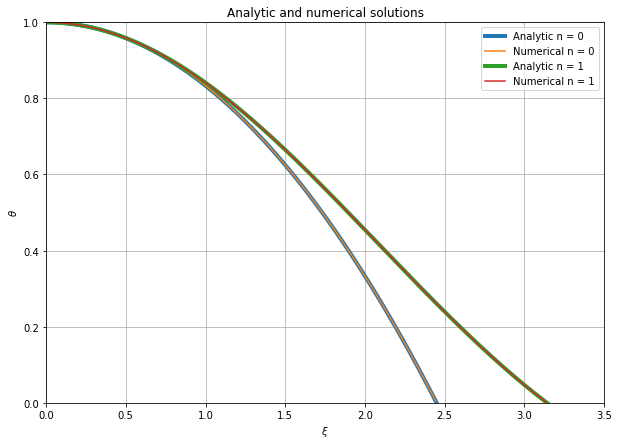

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(x, analytic_0(x), label = "Analytic n = 0", linewidth = 4)
plt.plot(x[:len(theta[0])], theta[0], label= "Numerical n = {:n}".format(n[0]), linewidth = 1.5)
plt.plot(x, analytic_1(x), label = "Analytic n = 1", linewidth = 4)
plt.plot(x[:len(theta[2])], theta[2], label= "Numerical n = {:n}".format(n[2]), linewidth = 1.5)
plt.legend(loc=1)
plt.title('Analytic and numerical solutions')
plt.xlim(0,3.5)
plt.xlabel(r'$\xi$')
plt.ylim(0,1)
plt.ylabel(r'$\theta$')
plt.grid(True)

It is evident that the solutions are equivalent.

## White dwarf polytropic model

White dwarves are the final stage of low mass stars and are composed of degenerate material. In the case of a non-relativistic degenerate electron gas, the equation of state is:


Which is a polytropic equation of state, i.e. $P = K \rho^{\gamma}$ where $\gamma = 1 + \frac{1}{n}$, and $n=3/2$.

### Solution to Lane-Emden equantion with n=3/2

Following the same procedure as above, I can get the solution of the Lane-Emden equation with index $n=3/2$.

In [ ]:
### White Dwarf model n=3/2

n_wd = 3/2
wd_solution = odeint(lane_emden, initial, x, args=(n_wd,))
wd_theta = []
for i in wd_solution[:,0]:
  if i > 0:
    wd_theta.append(i)
  else:
    break
wd_dtheta = wd_solution[:len(wd_theta),1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


### From dimensionless numerical solution to physical quantities, two white dwarves examples:



Having the numerical solution for a polytropic model of a non-relativistic white dwarf, the principal physical quantities, radius $R$ and mass $M$, can be calculated. Passing from the numerical solution of $\theta$ to the density profile of the star is straightfoward through the relation:


For this, it is needed is to know the central density of the white dwarf.

The dimensionless quantity $\xi$ in the Lane-Emden equation is related with the radial coordinate of the star through:


Hence, to get the radius, it is needed to know $\alpha$. $\alpha$ is related to the constant of the polytropic equation of state through:


Now, having the non-relativistic degenerate electron gas equation of state, and noting that a white dwarf is completely depleted of hydrogen, i.e. $\mu_\textrm{e} \approx 2$, $\alpha$ can be calculated and therefore, the radius of the star can be retrieved.

For the mass profile, having both density profile and the radius, it is a direct integration using the equation for the mass contained inside a radius $r$:


With these, all is set to convert from the dimensionless solution to actual physical quantities. First, let's define the needed quantities and constants:

In [ ]:
mue = 2 # composition of the star
K1 = (1e7/(mue**(5/3)))*(u.m**4 * u.kg**(-2/3) * u.s**(-2)) # constant of the equation of state
G = 6.67408e-11 * (u.m**3 * u.kg**(-1) * u.s**(-2))
R_sun = 6.957e8 * u.m
M_sun = 1.988e30 * u.kg

Now, the two problems can be solved (note the use of the Astropy units package in order to check whether the dimensions of the result are correct):

* $\rho_\textrm{c} = 10^9 \textrm{ kg m}^{-3}$

In [ ]:
## FIRST WHITE DWARF
rho_c_1 = 1e9 * (u.kg * u.m**(-3))
alpha_1 = np.sqrt(((n_wd +1)*K1)/(4*np.pi * G * rho_c_1**((n_wd - 1)/n_wd)))
rho_1 = []
r_1 = []
m_1 = []
for i in range(0,len(wd_theta)):
  rho_1.append(rho_c_1*(wd_theta[i]**n_wd))
  r_1.append(alpha_1*x[i])
  if i==0: # loop for numerical integration of the mass
    m_1.append(4*np.pi * r_1[i]**3 * rho_1[i])
  else:
    m_1.append((4*np.pi * r_1[i]**2 * rho_1[i] * (r_1[i]-r_1[i-1])) + m_1[i-1])

RR_sun_1 = [] # radius in solar radius units
for i in r_1:
  RR_sun_1.append(i/R_sun)

logrho_1 = []  # logarithm of the density
for i in rho_1:
  j = i*(u.m**3 * u.kg**(-1))
  logrho_1.append(np.log10(j))

MM_sun_1 = [] # mass in solar mass units
for i in m_1:
  MM_sun_1.append(i/M_sun)

* $\rho_\textrm{c} = 5 \times 10^9 \textrm{ kg m}^{-3}$

In [ ]:
## SECOND WHITE DWARF
rho_c_2 = 5e9 * (u.kg * u.m**(-3))
alpha_2 = np.sqrt((n_wd +1)*K1 / (4*np.pi * G * rho_c_2**((n_wd - 1)/n_wd)))
rho_2 = []
r_2 = []
m_2 = []
for i in range(0,len(wd_theta)):
  rho_2.append(rho_c_2*(wd_theta[i]**n_wd))
  r_2.append(alpha_2*x[i])
  if i==0: # loop for numerical integration of the mass
    m_2.append(4*np.pi * r_2[i]**3 * rho_2[i])
  else:
    m_2.append((4*np.pi * r_2[i]**2 * rho_2[i] * (r_2[i]-r_2[i-1])) + m_2[i-1])

RR_sun_2 = [] # radius in solar radius units
for i in r_2:
  RR_sun_2.append(i/R_sun)

logrho_2 = [] # logarithm of the density
for i in rho_2:
  j = i*(u.m**3 * u.kg**(-1))
  logrho_2.append(np.log10(j))

MM_sun_2 = [] # mass in solar mass units
for i in m_2:
  MM_sun_2.append(i/M_sun)

Finally, the radius and mass of the two white dwarves are:

In [ ]:
print('{:>28}'.format('Central density'), '{:>12}'.format('R'), '{:>10}'.format('R/Ro'),'{:>13}'.format('M'), '{:>10}'.format('M/Mo'))
print('{:20.1E}'.format(rho_c_1), '{:10.1E}'.format(r_1[-1]), '{:10.3f}'.format(RR_sun_1[-1]), '{:10.1E}'.format(m_1[-1]), '{:10.3f}'.format(MM_sun_1[-1]))
print('{:20.1E}'.format(rho_c_2), '{:10.1E}'.format(r_2[-1]), '{:10.3f}'.format(RR_sun_2[-1]), '{:10.1E}'.format(m_2[-1]), '{:10.3f}'.format(MM_sun_2[-1]))

             Central density            R       R/Ro             M       M/Mo
             1.0E+09 kg / m3    1.1E+07 m      0.016    9.8E+29 kg      0.494
             5.0E+09 kg / m3    8.5E+06 m      0.012    2.2E+30 kg      1.104


Plotting the density $\log \rho$ and mass $M/ M \odot$ profile in terms of the radius $R/R\odot$ leads to:

[Text(0, 0.5, '$M/M_\\odot$'), Text(0.5, 0, '$R/R_\\odot$')]

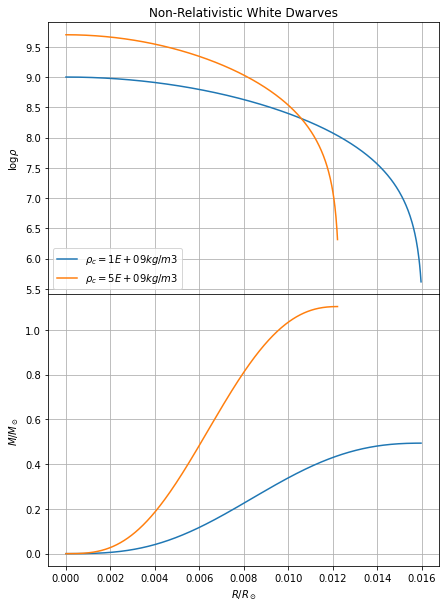

In [ ]:
## PLOTTING RESULTS

fig = plt.figure(figsize=(7,10))
(ax1, ax2) = fig.subplots(2, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

ax1.grid(True)
ax1.set_title('Non-Relativistic White Dwarves')
ax1.plot(RR_sun_1, logrho_1, label = r'$\rho_c = {:.0E}$'.format(rho_c_1))
ax1.plot(RR_sun_2, logrho_2, label = r'$\rho_c = {:.0E}$'.format(rho_c_2))
ax1.legend(loc=3)
ax1.set(ylabel=r'$\log \rho$')

ax2.grid(True)
ax2.plot(RR_sun_1, MM_sun_1, )
ax2.plot(RR_sun_2, MM_sun_2)
ax2.set(xlabel = r'$R/R_\odot$', ylabel=r'$M/M_\odot$')

It can be seen that the density profile has the same shape for both stars but in a smaller radius scale. The differences in the density profile are correspondent to the initial difference in the central density. Then, a higher central density translates to a smaller star. In the case of the mass profile, both share a similar shape but, as the density is higher leading to a smaller radius, the profile is steeper for the second star.